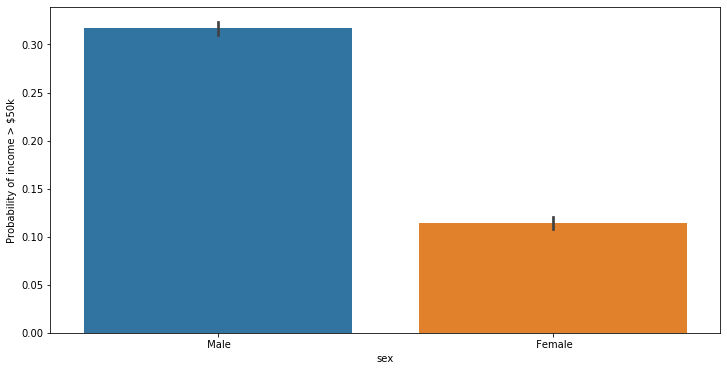

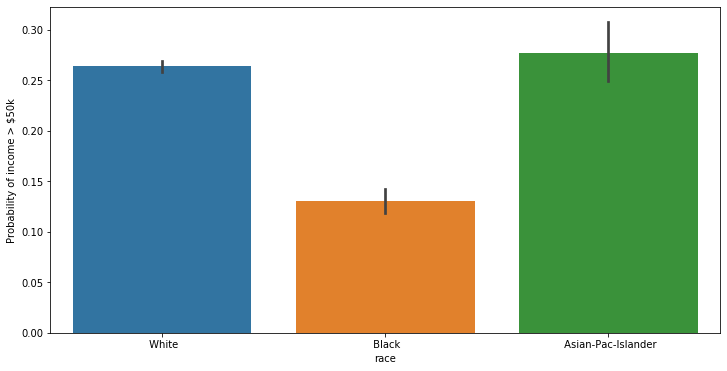

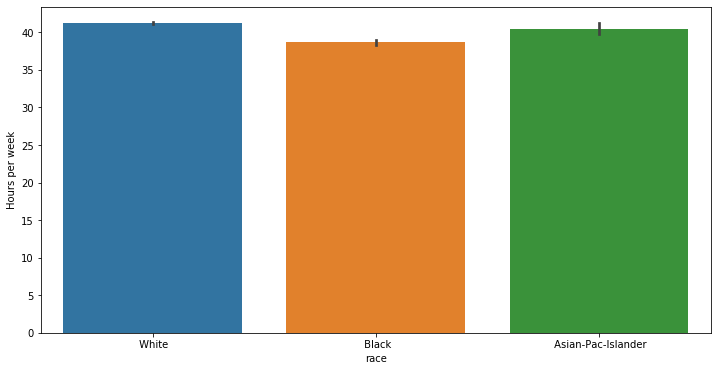

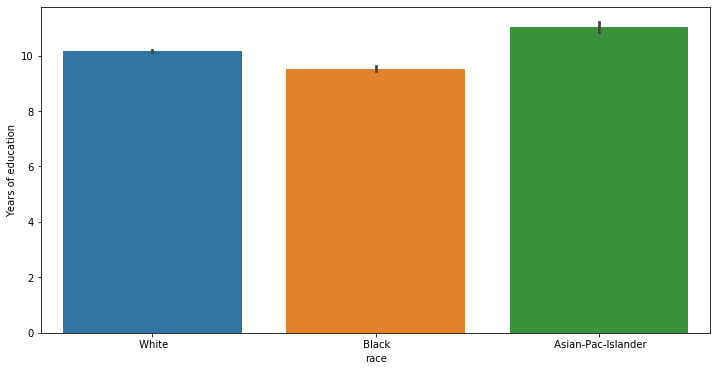

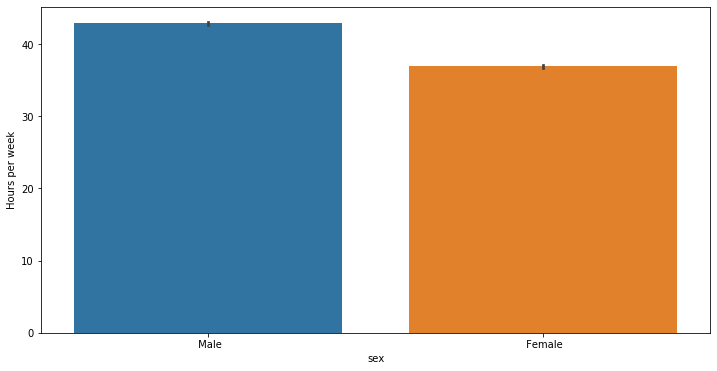

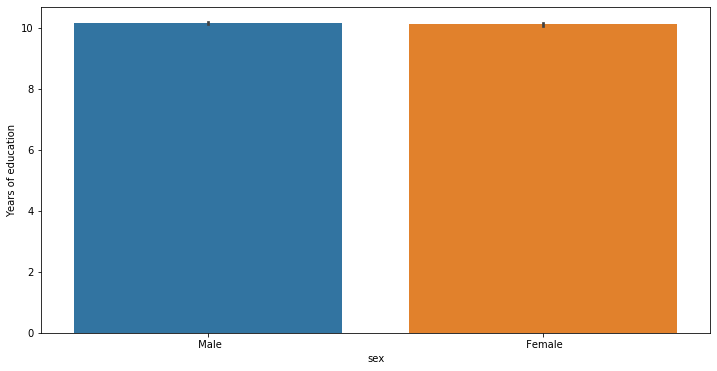

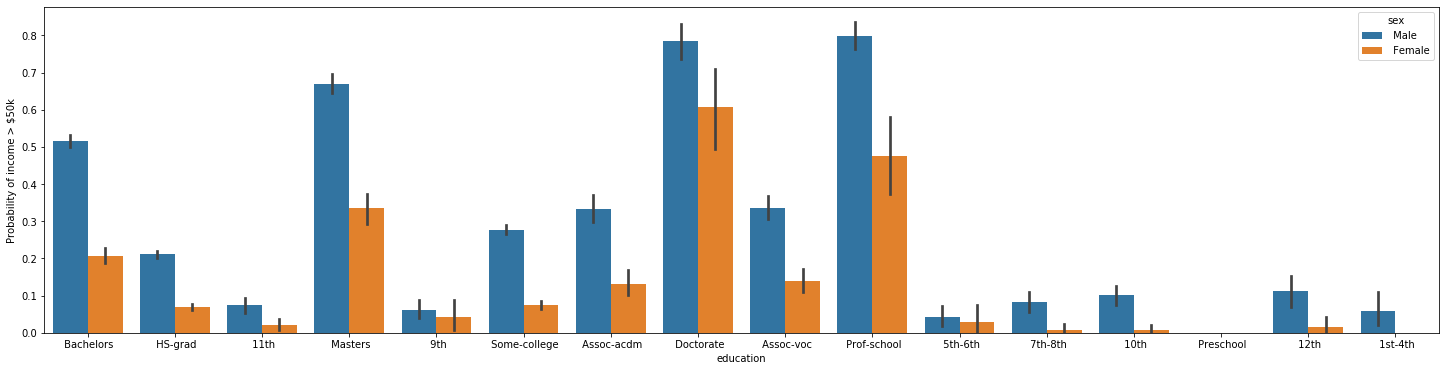

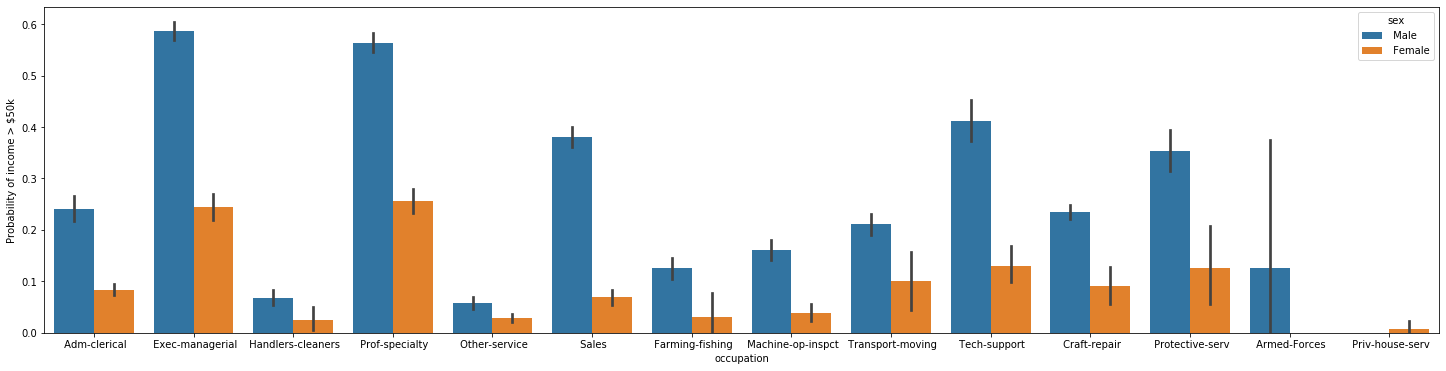

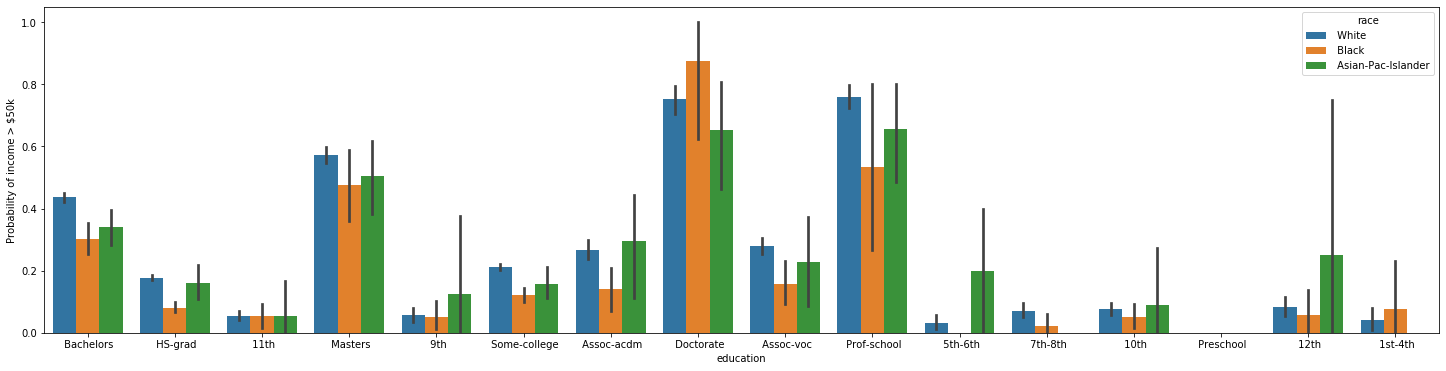

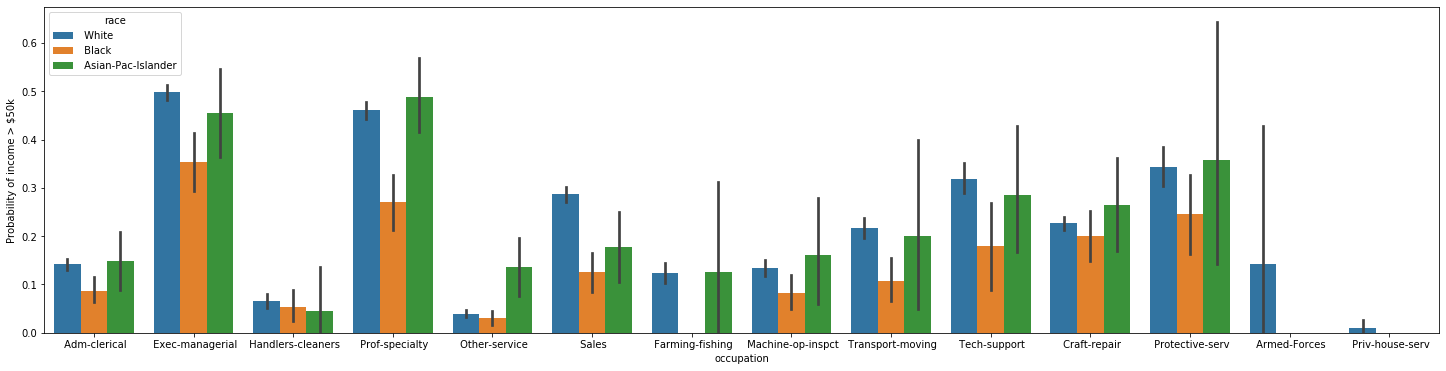

In [0]:
# analisi esplorativa
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files

colNames = ['age',
  'workclass',
  'fnlwgt',
  'education',
  'education-num',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'capital-gain',
  'capital-loss',
  'hours-per-week',
  'native-country',
  'salary']

train_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', index_col=False, header=None,sep=',', names=colNames)
test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', index_col=False, header=None,sep=',',names=colNames, skiprows=1)
# test_data.fnlwgt = test_data.fnlwgt.astype(int)

train_data = train_data.replace(' Holand-Netherlands', pd.np.nan).dropna(axis=0)

train_data = train_data.replace(' ?', pd.np.nan).dropna(axis=0)

train_data = train_data.replace(" >50K", 1)
train_data = train_data.replace(" <=50K", 0)

train_data = train_data.replace(' Other', pd.np.nan).dropna(axis=0)
train_data = train_data.replace(' Amer-Indian-Eskimo', pd.np.nan).dropna(axis=0)

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='salary', data=train_data)
ax.set(ylabel='Probability of income > $50k')
plt.savefig("train_not_fair_gender.png")
files.download("train_not_fair_gender.png") 

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='salary', data=train_data)
ax.set(ylabel='Probability of income > $50k')
plt.savefig("train_not_fair_races.png")
files.download("train_not_fair_races.png") 

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='hours-per-week', data=train_data)
ax.set(ylabel='Hours per week')
plt.savefig("train_not_fair_races_hours.png")
files.download("train_not_fair_races_hours.png") 

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='education-num', data=train_data)
ax.set(ylabel='Years of education')
plt.savefig("train_not_fair_races_education.png")
files.download("train_not_fair_races_education.png") 

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='hours-per-week', data=train_data)
ax.set(ylabel='Hours per week')
plt.savefig("train_not_fair_gender_hours.png")
files.download("train_not_fair_gender_hours.png") 

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='education-num', data=train_data)
ax.set(ylabel='Years of education')
plt.savefig("train_not_fair_gender_education.png")
files.download("train_not_fair_gender_education.png") 

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education',y='salary', data=train_data, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("train_not_fair_gender_education_level.png")
files.download("train_not_fair_gender_education_level.png") 

plt.figure(figsize=(25,6))
ax=sns.barplot(x='occupation',y='salary', data=train_data, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("train_not_fair_gender_occupation_level.png")
files.download("train_not_fair_gender_occupation_level.png") 

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education',y='salary', data=train_data, hue='race')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("train_not_fair_races_education_level.png")
files.download("train_not_fair_races_education_level.png") 

plt.figure(figsize=(25,6))
ax=sns.barplot(x='occupation',y='salary', data=train_data, hue='race')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("train_not_fair_races_occupation_level.png")
files.download("train_not_fair_races_occupation_level.png") 




Ricordarsi di scrivere il discorso che abbiamo droppato le classi di minoranza nel dataset, poicè avevano un numero di esempi troppo piccolo per farci delle considerazioni e other non voleva dire nulla.
Andando a vedere le caratteristiche che pensiamo essere collegate al merito per avere uno stipendio più alto, scopriamo che in media, gli anni di educazione sono abbastanza simili tra le varie razze e anche se distinguiamo tra uomini e donne. Le stesse osservazioni valgono per la quantità di ore lavorative. Quando però ci si sposta sul grafico che mostra il numero di persone che guadagnano più di 50k, si scopre che c'è una discriminazione razziale, nel senso che nonostante i neri lavorino e studino quando i bianchi, hanno meno "successo" (ci sono meno neri che guadagnano più di 50k rispetto ai bianchi). In più, si può osservare che spostandosi all'interno di ciascuna razza, nonostante le donne studino e lavorino similmente agli uomini, vi è anche qui una discriminazione sostanziale. In problema è che ci si aspetterebbe che siccome in media le ore lavorative e gli anni di istruzione sono quelli, allora anche le frazioni di persone che guadagnano di più di 50k dovrebbero essere simili.
Gli ultimi due grafici mostrano ancora di più queste osservazioni. Infatti a parità di occupazione, nonostante stessi anni di studio e stesse ore lavorative settimanali, i bianchi guadagnano di più dei neri e lo stesso gli uomini guadagnano di più delle donne.

Le donne e gli uomini hanno stesse ore di lavoro (5 ore di differenza) e stessi anni di istruzione e lo stesso vale per le razze.

Da capire se queste osservazioni dipendono dal semplice fatto che ci sono più uomini rispetto alle donne, più bianchi rispetto ai neri nel dataset.

In [0]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

colNames = ['age',
  'workclass',
  'fnlwgt',
  'education',
  'education-num',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'capital-gain',
  'capital-loss',
  'hours-per-week',
  'native-country',
  'salary']

train_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', index_col=False, header=None,sep=',', names=colNames)
test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', index_col=False, header=None,sep=',',names=colNames, skiprows=1)

train_data = train_data.replace(' Holand-Netherlands', pd.np.nan).dropna(axis=0)

train_data = train_data.replace(' ?', pd.np.nan).dropna(axis=0)
test_data = test_data.replace(' ?', pd.np.nan).dropna(axis=0)

train_data = train_data.replace(' Other', pd.np.nan).dropna(axis=0)
test_data = test_data.replace(' Other', pd.np.nan).dropna(axis=0)

train_data = train_data.replace(' Amer-Indian-Eskimo', pd.np.nan).dropna(axis=0)
test_data = test_data.replace(' Amer-Indian-Eskimo', pd.np.nan).dropna(axis=0)

#train_data = train_data.replace(' Asian-Pac-Islander', pd.np.nan).dropna(axis=0)
#test_data = test_data.replace(' Asian-Pac-Islander', pd.np.nan).dropna(axis=0)

train = pd.get_dummies(train_data, columns=['workclass', 'education','marital-status','occupation','relationship','race', 'sex','native-country'])
test = pd.get_dummies(test_data, columns=['workclass', 'education','marital-status','occupation','relationship','race', 'sex','native-country'])

train = train.replace(" >50K", 1)
train = train.replace(" <=50K", 0)
test = test.replace(" >50K.", 1)
test = test.replace(" <=50K.", 0)

train_y = train['salary']
train_X = train.drop(columns=['salary'])

test_y = test['salary']
test_X = test.drop(columns=['salary']) 

logistic_model = LogisticRegression(tol=0.00000001)
logistic_model.fit(train_X,train_y)
    
predict_train = logistic_model.predict(train_X)
predict_test = logistic_model.predict(test_X)

print("Model's Accuracy values:",logistic_model.score(test_X,test_y))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model's Accuracy values: 0.8475218067482588


Statistical parity males vs females on predictions 0.1880813063081353
FP Ratio Male|Female
0.2724539646749342 0.24802110817941952
FN Ratio Male|Female
0.16026254615069055 0.059513074842200184


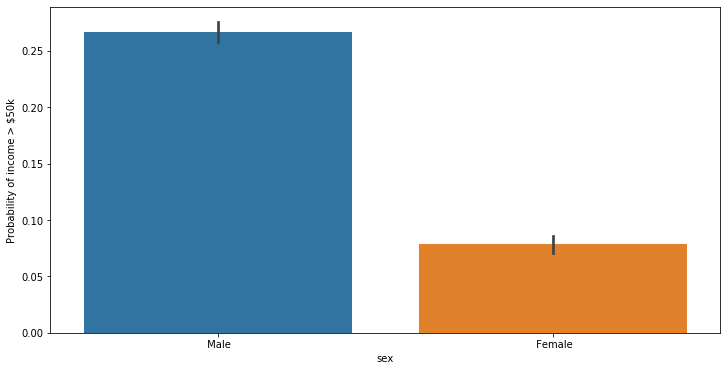

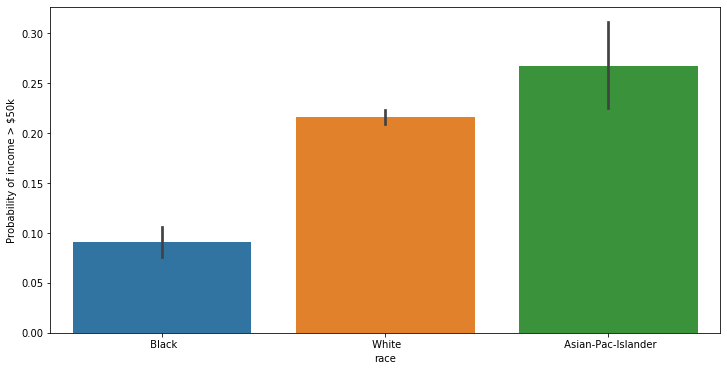

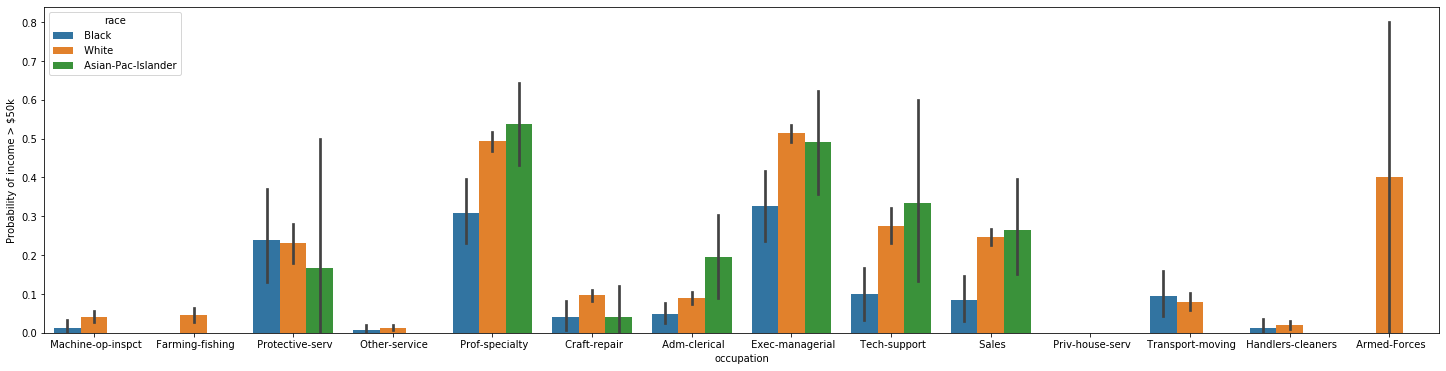

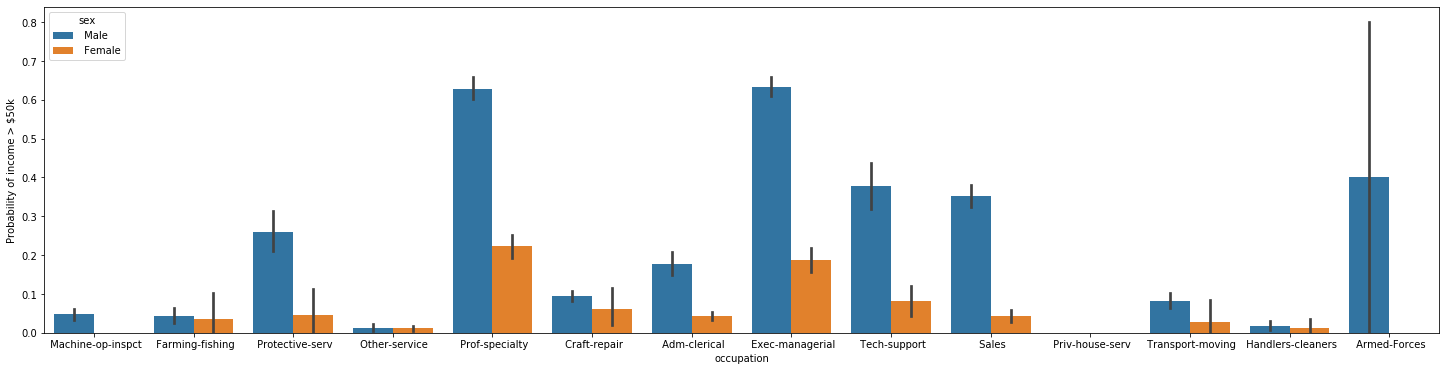

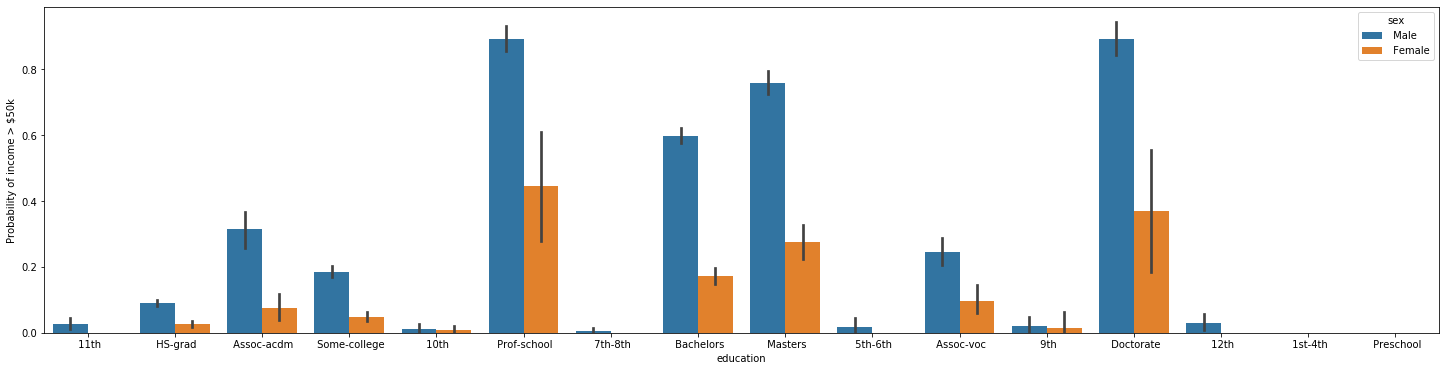

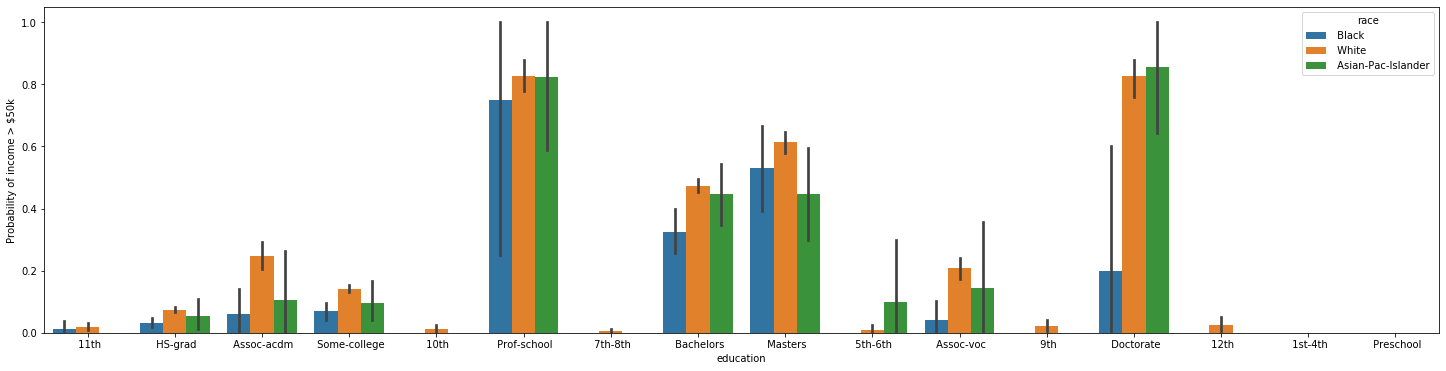

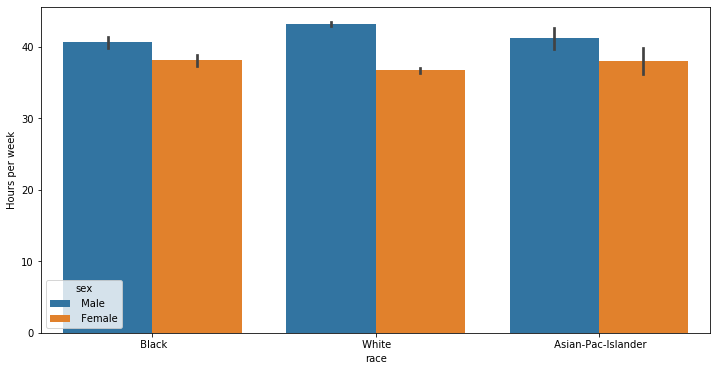

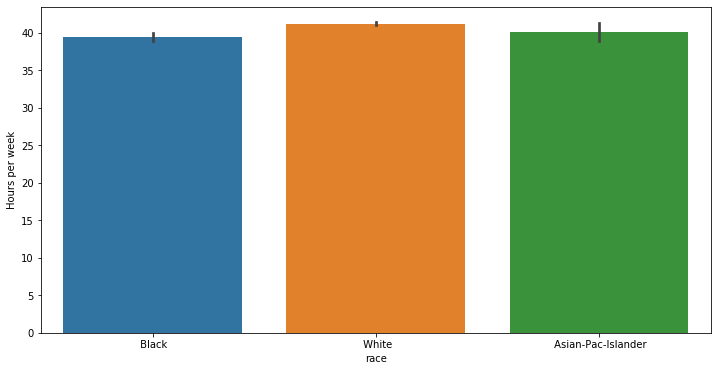

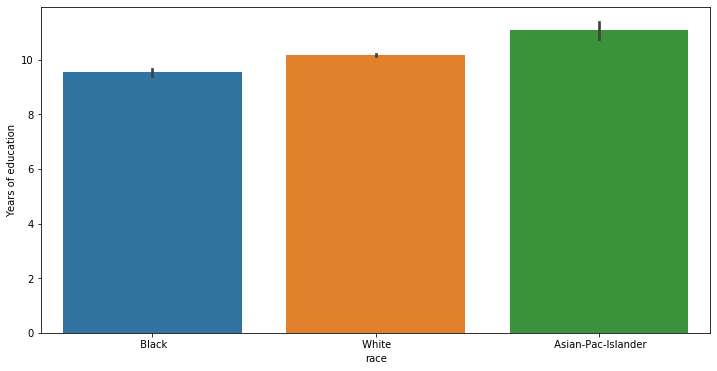

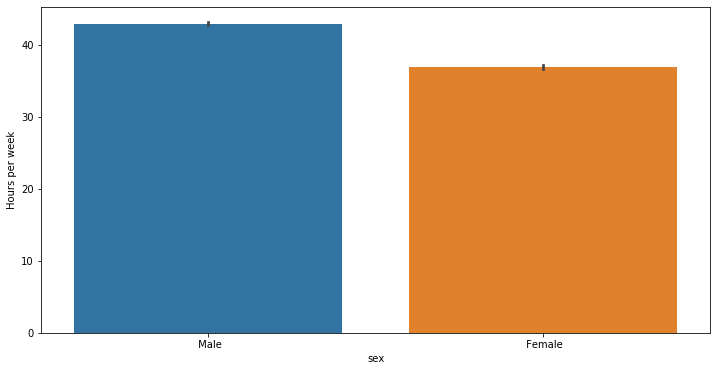

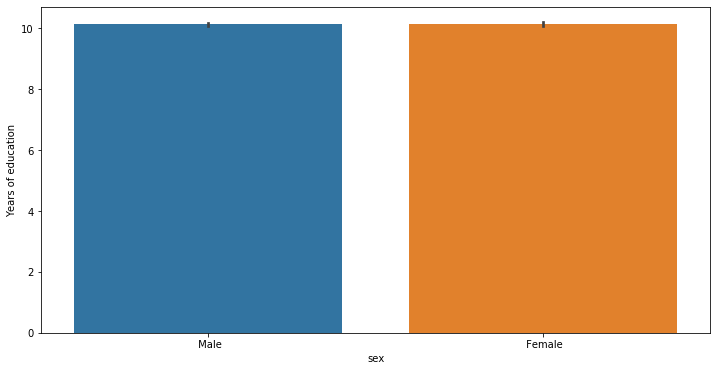

In [0]:
test_data = test_data.replace(" >50K.", 1)
test_data = test_data.replace(" <=50K.", 0)
frame_graph = test_data
frame_graph['prediction'] = predict_test

'''
plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='prediction', data=frame_graph)
ax.set(ylabel='Probability of income > $50k')
plt.savefig("predictions_not_fair_model_gender.png")
files.download("predictions_not_fair_model_gender.png") 

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='prediction', data=frame_graph)
ax.set(ylabel='Probability of income > $50k')
plt.savefig("predictions_not_fair_model_races.png")
files.download("predictions_not_fair_model_races.png") 

plt.figure(figsize=(25,6))
ax=sns.barplot(x='occupation',y='prediction', data=frame_graph, hue='race')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("predictions_not_fair_model_races_occupation_level.png")
files.download("predictions_not_fair_model_races_occupation_level.png")

plt.figure(figsize=(25,6))
ax=sns.barplot(x='occupation',y='prediction', data=frame_graph, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("predictions_not_fair_model_gender_occupation_level.png")
files.download("predictions_not_fair_model_gender_occupation_level.png")

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education',y='prediction', data=frame_graph, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("predictions_not_fair_model_gender_education_level.png")
files.download("predictions_not_fair_model_gender_education_level.png")

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education',y='prediction', data=frame_graph, hue='race')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("predictions_not_fair_model_races_education_level.png")
files.download("predictions_not_fair_model_races_education_level.png")

## da qui non mi servono più

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='hours-per-week', data=frame_graph, hue='sex')
ax.set(ylabel='Hours per week')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='hours-per-week', data=frame_graph)
ax.set(ylabel='Hours per week')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='education-num', data=frame_graph)
ax.set(ylabel='Years of education')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='hours-per-week', data=frame_graph)
ax.set(ylabel='Hours per week')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='education-num', data=frame_graph)
ax.set(ylabel='Years of education')

# metriche su prediction del modello allenato su dataset non fair
# metriche su predictions

up = len(frame_graph[(frame_graph['sex'] == ' Male') & (frame_graph['prediction'] == 1)])
nu = len(frame_graph[(frame_graph['sex'] == ' Male')])
dp = len(frame_graph[(frame_graph['sex'] == ' Female') & (frame_graph['prediction'] == 1)])
nd = len(frame_graph[(frame_graph['sex'] == ' Female')])
print("Statistical parity males vs females on predictions",up/nu - dp/nd)

# uomini donne
# uomini fP
ufp = len(frame_graph[(frame_graph['sex'] == ' Male') & (frame_graph['salary'] == 0) & (frame_graph['prediction'] == 1)])
utp = len(frame_graph[(frame_graph['sex'] == ' Male') & (frame_graph['salary'] == 1) & (frame_graph['prediction'] == 1)])

uratio = ufp/(ufp+utp)

dfp = len(frame_graph[(frame_graph['sex'] == ' Female') & (frame_graph['salary'] == 0) & (frame_graph['prediction'] == 1)])
dtp = len(frame_graph[(frame_graph['sex'] == ' Female') & (frame_graph['salary'] == 1) & (frame_graph['prediction'] == 1)])
dratio = dfp/(dfp+dtp)

print("FP Ratio Male|Female")
print(uratio, dratio)

# false negative
# uomini donne
# uomini fN
ufp = len(frame_graph[(frame_graph['sex'] == ' Male') & (frame_graph['salary'] == 1) & (frame_graph['prediction'] == 0)])
utp = len(frame_graph[(frame_graph['sex'] == ' Male') & (frame_graph['salary'] == 0) & (frame_graph['prediction'] == 0)])

uratio = ufp/(ufp+utp)

dfp = len(frame_graph[(frame_graph['sex'] == ' Female') & (frame_graph['salary'] == 1) & (frame_graph['prediction'] == 0)])
dtp = len(frame_graph[(frame_graph['sex'] == ' Female') & (frame_graph['salary'] == 0) & (frame_graph['prediction'] == 0)])
dratio = dfp/(dfp+dtp)

print("FN Ratio Male|Female")
print(uratio, dratio)
# è diventato più accurato e quindi è aumentato il bias di conseguenza e lo si vede sulla statistical parity

Sul test set le ore lavorative e gli anni di istruzione seguono la stessa distribuzione del train set, il che significa che tra le varie razze non c'è molta distinzione riguardo gli anni di istruzione e le ore lavorative e lo stesso vale tra uomini e donne, e quindi i risultati possono essere comparati (grafici precedenti con questi grafici).
I grafici mostrano le predizioni effettuate dal modello allenato. E' possibile osservare che le predizioni del modello allenato portano a meno unfairness rispetto alle ground truth nei dati di train. Da capire se il motivo possa essere il ristretto numero di esempi che si trovano nel test set.



0        0
1        0
2        1
3        1
5        0
        ..
16275    0
16276    0
16278    0
16279    0
16280    1
Name: salary, Length: 14789, dtype: int64


[Text(0, 0.5, 'Fraction of people with income > $50k')]

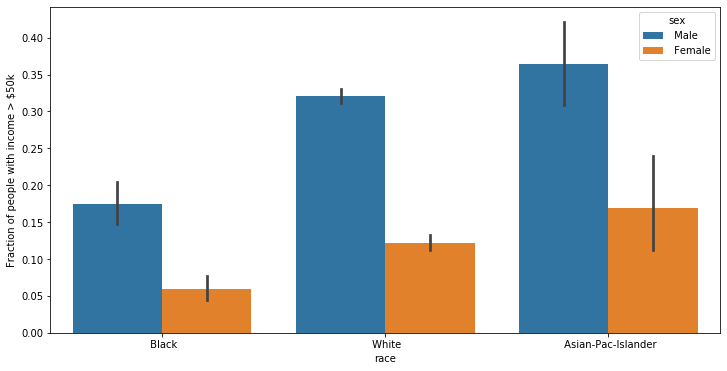

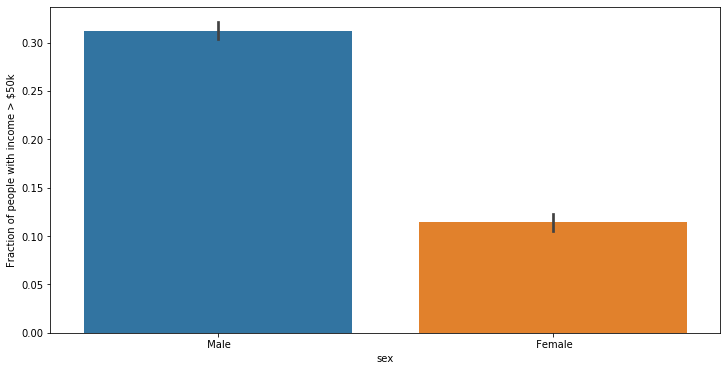

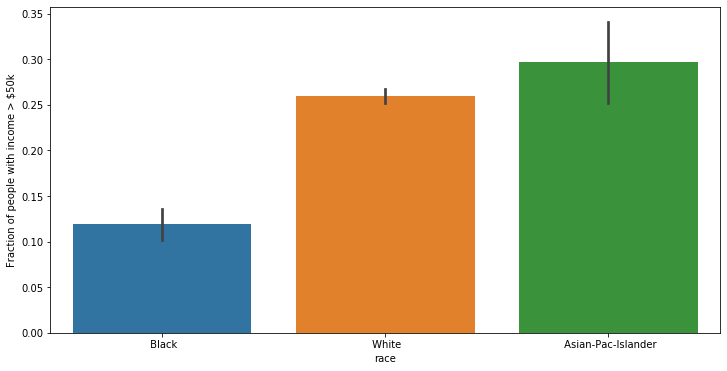

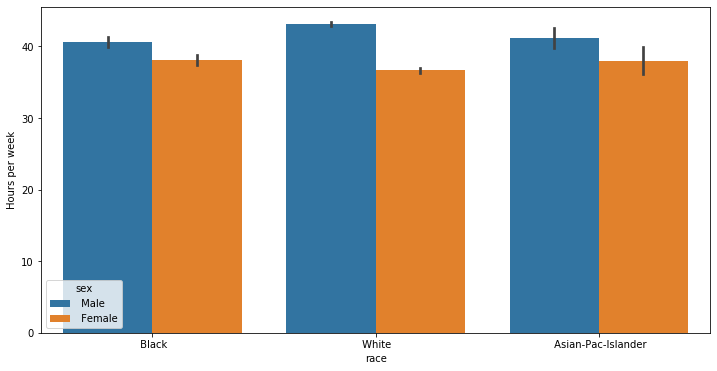

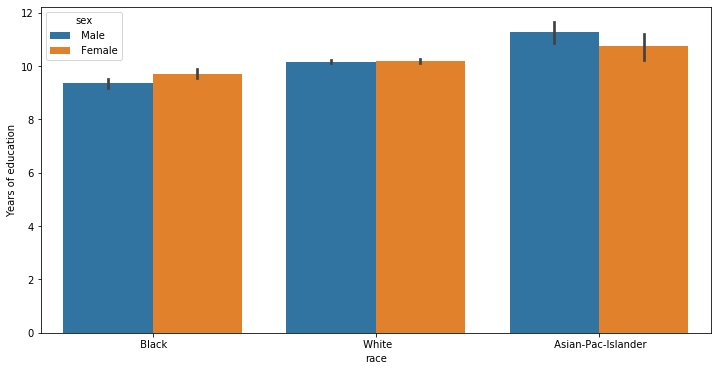

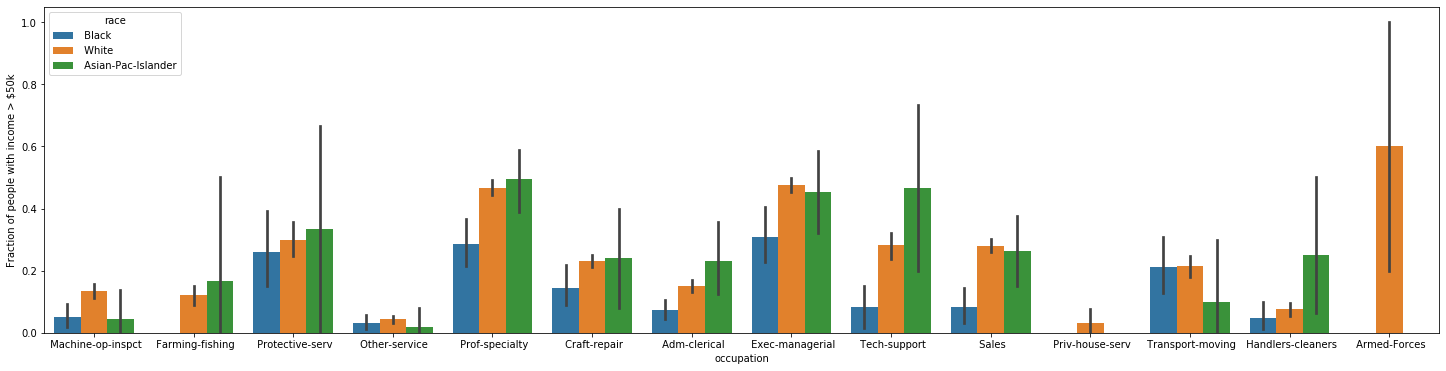

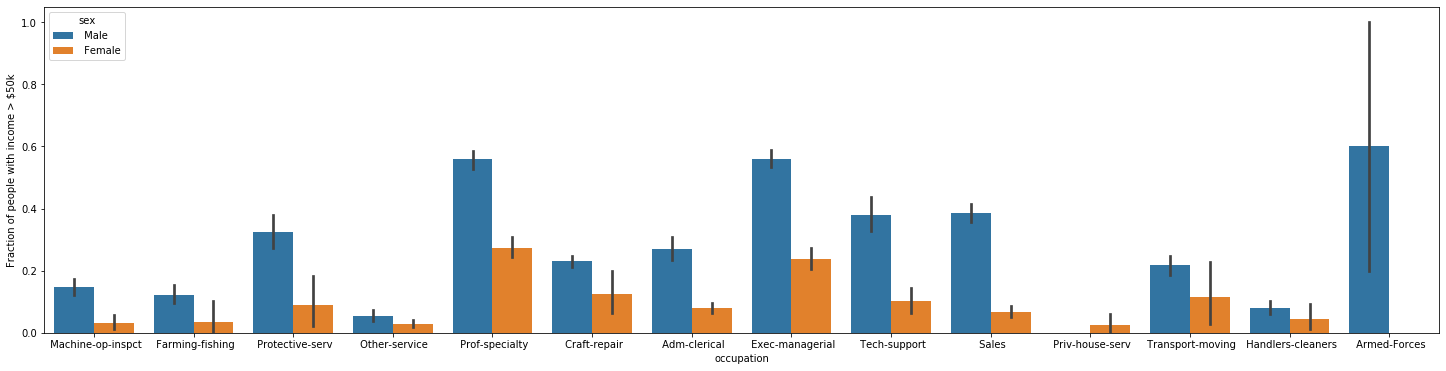

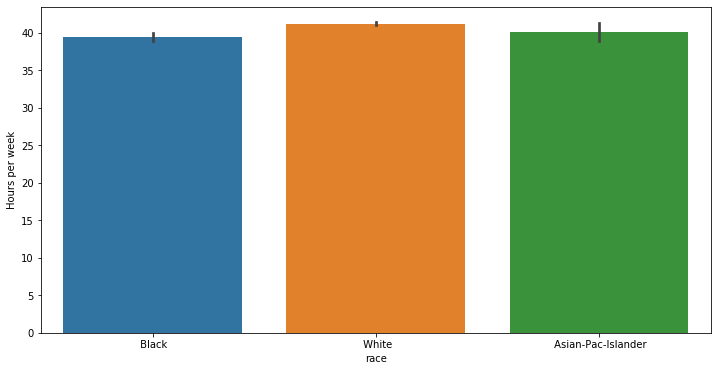

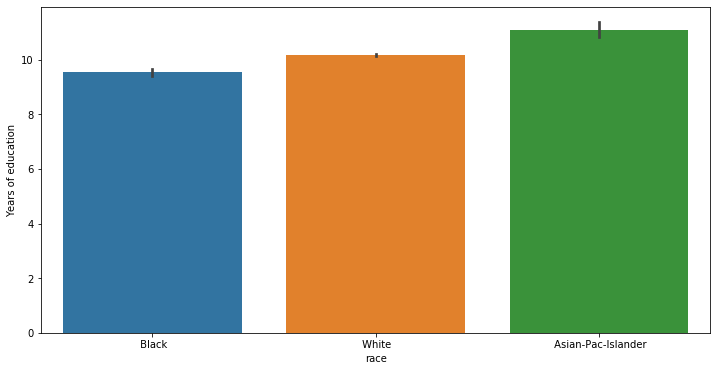

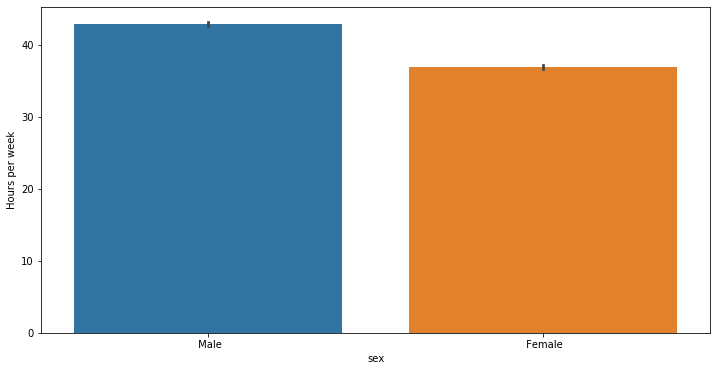

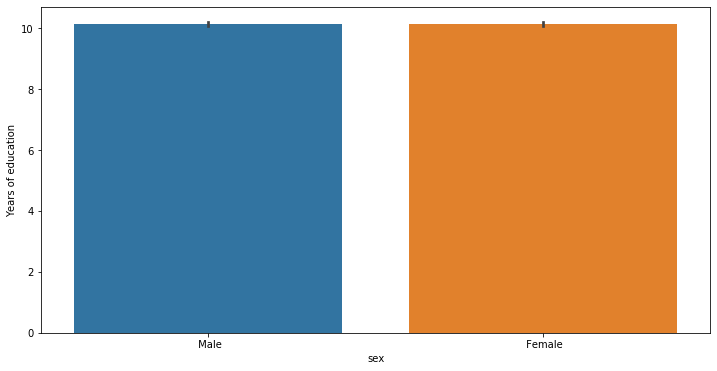

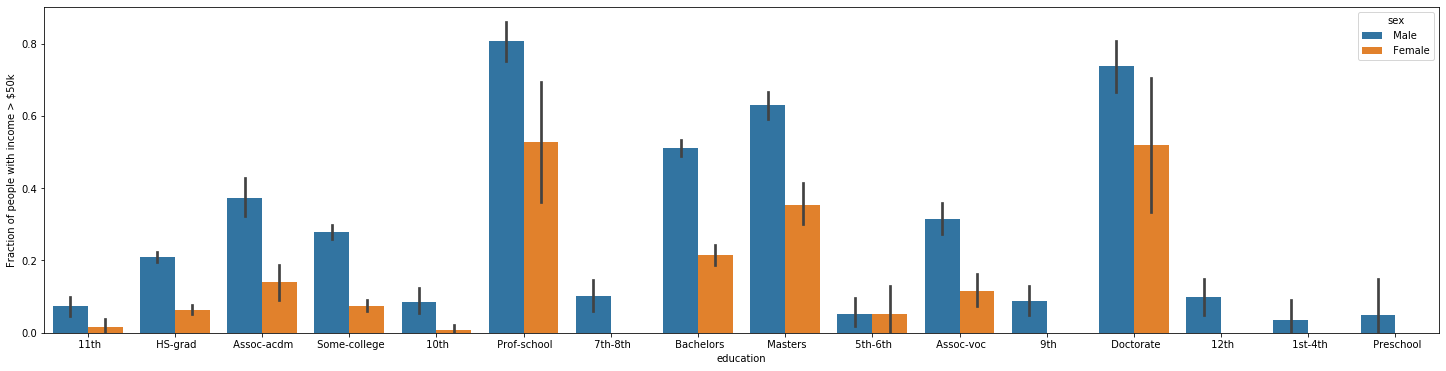

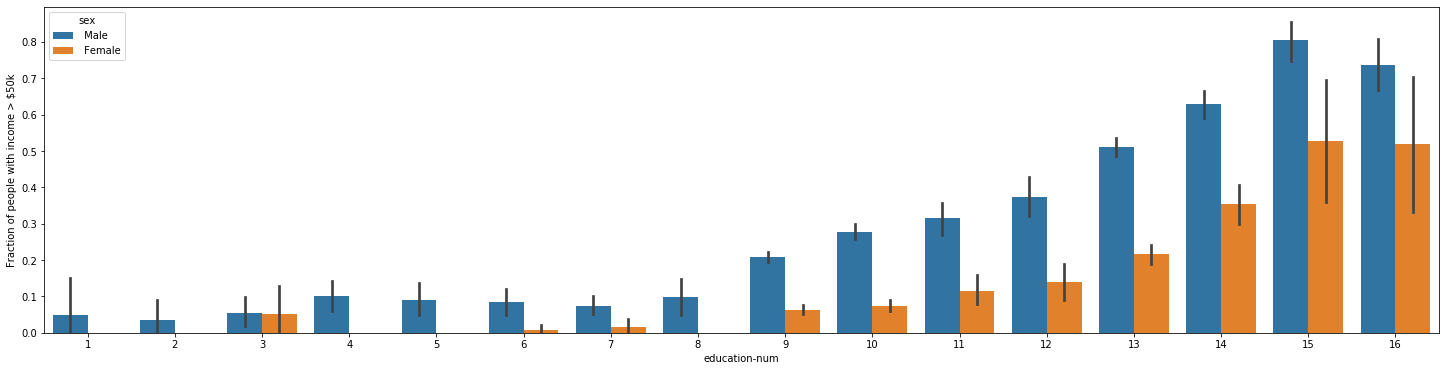

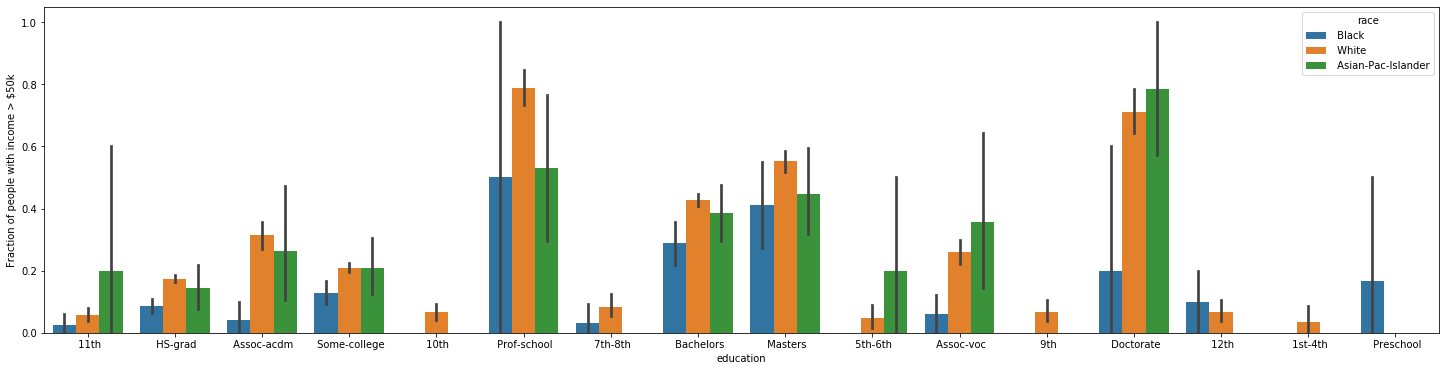

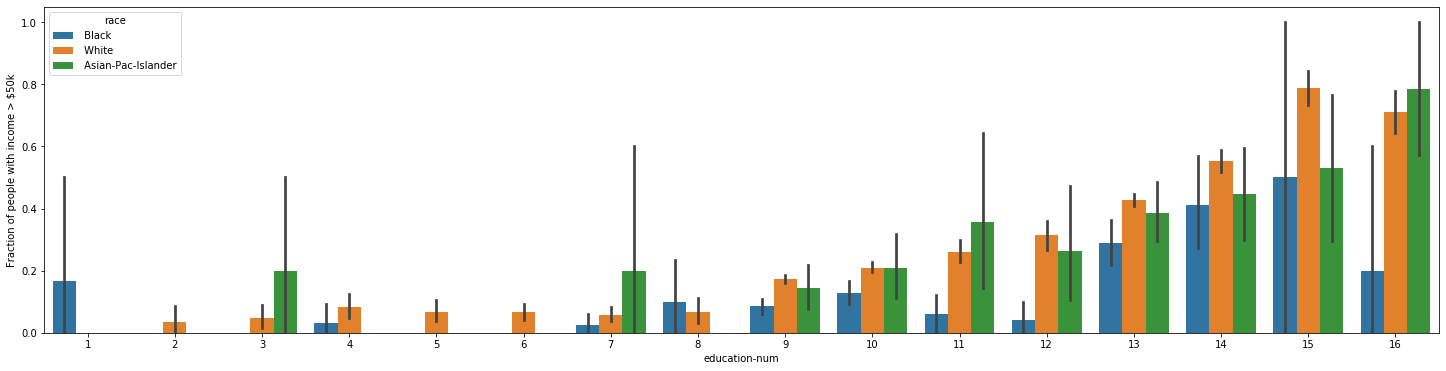

In [0]:
print(frame_graph['salary'])
plt.figure(figsize=(12,6))
ax=sns.barplot(x='race', y='salary', data=frame_graph, hue='sex')
ax.set(ylabel='Fraction of people with income > $50k')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='salary', data=frame_graph)
ax.set(ylabel='Fraction of people with income > $50k')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='salary', data=frame_graph)
ax.set(ylabel='Fraction of people with income > $50k')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='hours-per-week', data=frame_graph, hue='sex')
ax.set(ylabel='Hours per week')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='education-num', data=frame_graph, hue='sex')
ax.set(ylabel='Years of education')

plt.figure(figsize=(25,6))
ax=sns.barplot(x='occupation',y='salary', data=frame_graph, hue='race')
ax.set(ylabel='Fraction of people with income > $50k')

plt.figure(figsize=(25,6))
ax=sns.barplot(x='occupation',y='salary', data=frame_graph, hue='sex')
ax.set(ylabel='Fraction of people with income > $50k')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='hours-per-week', data=frame_graph)
ax.set(ylabel='Hours per week')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='education-num', data=frame_graph)
ax.set(ylabel='Years of education')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='hours-per-week', data=frame_graph)
ax.set(ylabel='Hours per week')

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='education-num', data=frame_graph)
ax.set(ylabel='Years of education')

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education',y='salary', data=frame_graph, hue='sex')
ax.set(ylabel='Fraction of people with income > $50k')

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education-num',y='salary', data=frame_graph, hue='sex')
ax.set(ylabel='Fraction of people with income > $50k')

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education',y='salary', data=frame_graph, hue='race')
ax.set(ylabel='Fraction of people with income > $50k')

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education-num',y='salary', data=frame_graph, hue='race')
ax.set(ylabel='Fraction of people with income > $50k')

Da questi grafici si può vedere che anche nei dati di test c'è il bias che c'era nei dati di training e quindi ciò prova che il modello allenato sui dati di training è riuscito a correggere parte di questo bias senza alcuna correzione al modello. Il bias è ancora migliorabile con tecniche che vedremo a lezione.

Quando passiamo a calcolare le metriche sul test set scopriamo che per la statistical parity la fairness vale e quindi sembrerebbe che il modello abbia gestito bene il bias presente sui i dati training ma quando ci spostiamo sulle ratio metrics scopriamo che ci sono molti più falsi positivi nelle donne rispetto agli uomini. Questo significa che il modello cerca di massimizzare l'accuratezza andando molto bene sugli uomini però classifica male le donne, in quanto gli conviene per massimizzare l'accuratezza e siccome ha più esempi per gli uomini fa meno errori su quella classe.
Gli errori commessi sulla classe delle donne, fa si che il modello raggiunga una stabilità sulla statistical parity che è data però dalle molte donne che dovrebbero essere state classificate in maniera negativa che però vengono classificate in maniera positiva.
Da capire se questo discorso è legato alla fairness o semplicemente al fatto che il modello cerca di massimizzare l'accuratezza e siccome il dataset è sbilanciato il modello cerca di andare meglio che può sulla classe di classe di maggioranza.

Dall'altra parte quando calcoliamo i falsi negativi troviamo molti falsi negativi sugli uomini rispetto che sulle donne, quindi sembrerebbe che il modello stia cercando di compensare il bias presente nei dati, penalizzando un pò gli uomini e aumentando le donne e questo spiega la bassa accuratezza ottenuta. Questo dimostra la statistical partity che si è messa a posto. Infatti più la statistical parity va bene su un dataset sbilanciato e più significa che sto misclassificando per cercare di mettere a posto le cose.

Superato anche il twin test. Uomo bianco contro donna nera con le stesse caratteristiche.

**Storia dell'orso**

Il problema di questo dataset è che nonostante le persone abbiano gli stessi meriti (ore di lavoro e anni di istruzione alla pari) c'è una discriminazione razziale e di genere, nel senso che le persone di colore vengono pagati meno all'ora rispetto le persone bianche e lo stesso vale per le donne rispetto agli uomini. Quindi l'obiettivo del progetto è fare in modo che il modello che verrà allenato sui dati di training sconfigga questo bias presente nei dati di training storici, per fare in modo di classificare una donna e un uomo con le stesse caratteristiche di merito alla stessa maniera e quindi non essere più discriminatorio -> twin test.

Assumiamo che per chi ha uno stipendio maggiore vengano dati dei benefici dalla banca. Un consulente finanziario gratuito, fondi assicurativi di lusso, american express black gratis, prestiti sempre concessi.

Quindi chi si merita di avere questi benefici è perchè se lo merita e non solo perchè è bianco o uomo.